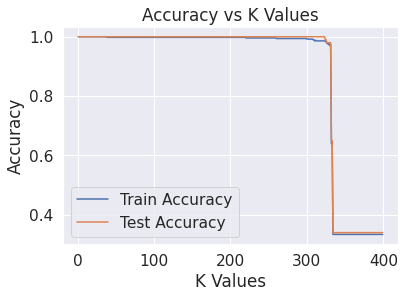

Best K value:  1


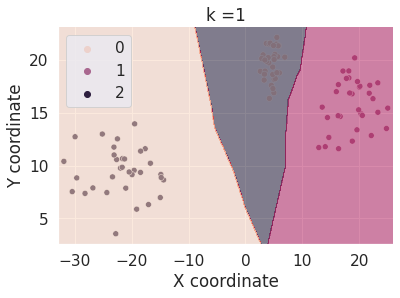

[[167.   0.   0.]
 [  0. 167.   0.]
 [  0.   0. 166.]]
[100.0, 100.0, 100.0]
[100.0, 100.0, 100.0, 100.0]


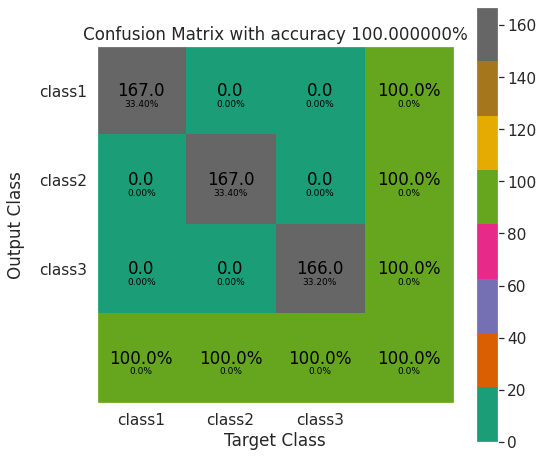

[[34.  0.  0.]
 [ 0. 33.  0.]
 [ 0.  0. 33.]]
[100.0, 100.0, 100.0]
[100.0, 100.0, 100.0, 100.0]


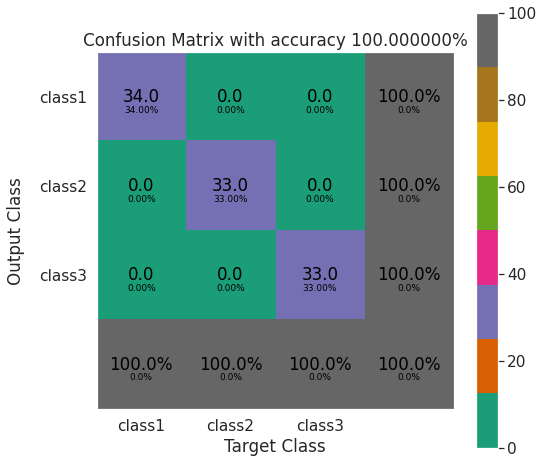

accuracy on test data: 1.0
accuracy on train data:  1.0


In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load train and test data
train_df = pd.read_csv('train_35_dataset2.csv')
test_df = pd.read_csv('test_35_dataset2.csv')
#Separate the features and target variable
X_train=train_df.iloc[:,:-1].values
y_train=train_df.iloc[:,-1].values
X_test=test_df.iloc[:,:-1].values
y_test=test_df.iloc[:,-1].values
def knnclassifier(X_train,y_train,X_test,k):
    #distance between particular test point and all training points
    dist=np.sqrt(((X_test[:,np.newaxis,:]-X_train[np.newaxis,:,:])**2).sum(axis=2))
    #indices of the k nearest neighbors for each test point
    nn_indices=np.argpartition(dist,k,axis=1)[:,:k]
    #labels of the k nearest neighbors
    nn_labels=y_train[nn_indices]
    #Predict the labels by majority
    y_pred=np.apply_along_axis(lambda x:np.bincount(x).argmax(),axis=1,arr=nn_labels)
    return y_pred

def calc_accuracy(y_true,y_pred):
    num_correct =np.sum(y_true == y_pred)
    num_total=y_true.shape[0]
    accuracy=num_correct / num_total
    return accuracy

def plt_confusion_matrix(y_true, y_pred, num_classes, c):
    k = np.zeros((num_classes, num_classes))
    #Plot the confusion matrix using sns heatmap
    for i in range(num_classes):
        for j in range(num_classes):
            k[i, j] = np.sum((y_true == i) & (y_pred == j))
    print(k)
    total = np.sum(k)
    percentages = (k / total) * 100
    new_column=[]
    for i in range(len(k)):
      new_column.append(100*k[i][i]/np.sum(k[i]))
    print(new_column)
    new_row=[]
    k=k.T
    for i in range(len(k)):
      new_row.append(100*k[i][i]/np.sum(k[i]))
    l=np.sum(new_row)/(len(new_row))
    new_row.append(np.sum(new_row)/(len(new_row)))
    k=k.T
    print(new_row)
    percentage=np.hstack((k,np.array([new_column]).T))
    percentage=np.vstack((percentage,np.array([new_row])))
    k=percentage

    #Create heatmap with annotations
    fig,ax = plt.subplots(figsize=(8,8))  #Set figsize to increase the size of cells
    im = ax.imshow(k,cmap='Dark2')

    #Loop over data dimensions and create text
    for i in range(len(k)):
        for j in range(len(k[0])):
            #Add confusion matrix text
            if i!=len(k)-1 and j!=len(k)-1:
              ax.text(j,i+0.15,f'{percentages[i,j]:.2f}%',ha="center",va="center",color="black",fontsize=9)
              ax.text(j,i,f'{k[i,j]:}',ha="center",va="center",color="black")
            else:
              ax.text(j,i,f'{k[i,j]:.1f}'+'%',ha="center",va="center",color="black")
              ax.text(j,i+0.15,f'{100-k[i,j]:.1f}'+'%', ha="center",va="center",color="black",fontsize=9)
    #Set ticks and axis labels
    ax.set_xticks(np.arange(len(k)-1))
    ax.set_yticks(np.arange(len(k)-1))
    ax.set_xticklabels(['class1','class2','class3'])
    ax.set_yticklabels(['class1','class2','class3'])
    ax.set_xlabel('Target Class')
    ax.set_ylabel('Output Class')
    ax.xaxis.set_label_coords(0.5,-0.08)
    ax.yaxis.set_label_coords(-0.2,0.5)
    ax.grid(False)
    ax.set_title(f"Confusion Matrix with accuracy {l:1f}%")    
    fig.colorbar(im)
    plt.show()



#Define the K values to be tested
k_values=list(range(1, 400))
#Define empty lists to store train and test accuracy values for each k value
train_acc=[]
test_acc=[]

#Loop through each k value and calculate train and test accuracy
for k in k_values:
    #Train the KNN classifier on the training data
    ypredtrain=knnclassifier(X_train,y_train,X_train,k)
    #Calculate train accuracy
    acc_train=calc_accuracy(y_train,ypredtrain)
    train_acc.append(acc_train)
    #Predict on the test data using the trained classifier
    y_pred_test=knnclassifier(X_train,y_train,X_test,k)
    #Calculate test accuracy
    acc_test=calc_accuracy(y_test, y_pred_test)
    test_acc.append(acc_test)

#Plot the train and test accuracy versus k values
plt.plot(k_values, train_acc, label='Train Accuracy')
plt.plot(k_values, test_acc, label='Test Accuracy')
plt.title('Accuracy vs K Values')
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#Print the best K value based on the test accuracy
best_k = k_values[np.argmax(train_acc)]
print('Best K value: ', best_k)
k = best_k

#number of unique classes
num_classes = len(np.unique(y_train))

#Initialize lists to store the training and test accuracies for each k value
train_acc_1 =[]
test_acc_1 =[]
#predict on the training data
y_train_pred=knnclassifier(X_train, y_train, X_train, k)
#predict on the test data
y_test_pred=knnclassifier(X_train, y_train, X_test, k)
#Compute the training and test accuracies
train_acc=calc_accuracy(y_train, y_train_pred)
test_acc=calc_accuracy(y_test, y_test_pred)
#Store the accuracies in the lists
train_acc_1.append(train_acc)
test_acc_1.append(test_acc)
#Plot the test data with the decision boundary for the current k value
plt.figure()
sns.scatterplot(x=X_test[:, 0],y=X_test[:, 1],hue=y_test)
sns.despine()
plt.title(f'k ={k}')
#grid of points to plot the decision boundary
x_min,x_max=X_test[:,0].min()-1, X_test[:,0].max() +1
y_min,y_max=X_test[:,1].min()-1, X_test[:,1].max() +1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))
Z=knnclassifier(X_train,y_train,np.c_[xx.ravel(),yy.ravel()],k)
Z = Z.reshape(xx.shape)
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
#Plot the decision boundary
plt.contourf(xx,yy,Z,alpha=0.5)
plt.show()
#Calculate the confusion matrices for the current k value
plt_confusion_matrix(y_train,y_train_pred,num_classes,'training data')
plt_confusion_matrix(y_test,y_test_pred,num_classes,'test data')
#Print the accuracies for the current k value
print("accuracy on test data:", test_acc)
print("accuracy on train data: ", train_acc)

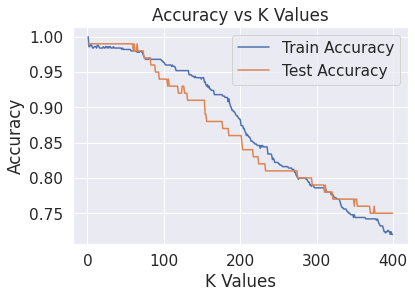

Best K value:  1


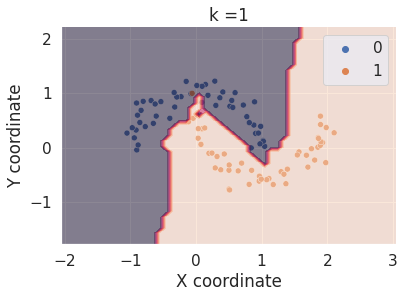

[[250.   0.]
 [  0. 250.]]
[100.0, 100.0]
[100.0, 100.0, 100.0]


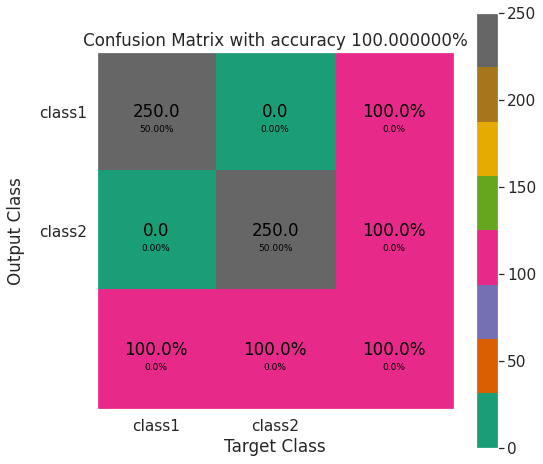

[[50.  0.]
 [ 1. 49.]]
[100.0, 98.0]
[98.03921568627452, 100.0, 99.01960784313727]


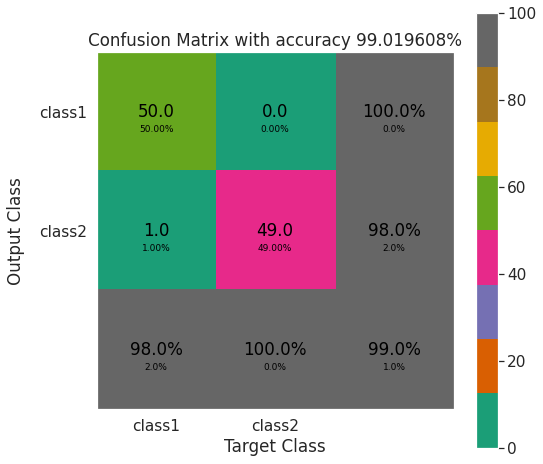

accuracy on test data: 0.99
accuracy on train data:  1.0


In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load train and test data
train_df = pd.read_csv('train_35_dataset3.csv')
test_df = pd.read_csv('test_35_dataset3.csv')
#Separate the features and target variable
X_train=train_df.iloc[:,:-1].values
y_train=train_df.iloc[:,-1].values
X_test=test_df.iloc[:,:-1].values
y_test=test_df.iloc[:,-1].values
def knnclassifier(X_train,y_train,X_test,k):
    #distance between particular test point and all training points
    dist=np.sqrt(((X_test[:,np.newaxis,:]-X_train[np.newaxis,:,:])**2).sum(axis=2))
    #indices of the k nearest neighbors for each test point
    nn_indices=np.argpartition(dist,k,axis=1)[:,:k]
    #labels of the k nearest neighbors
    nn_labels=y_train[nn_indices]
    #Predict the labels by majority
    y_pred=np.apply_along_axis(lambda x:np.bincount(x).argmax(),axis=1,arr=nn_labels)
    return y_pred

def calc_accuracy(y_true,y_pred):
    num_correct =np.sum(y_true == y_pred)
    num_total=y_true.shape[0]
    accuracy=num_correct / num_total
    return accuracy

def plt_confusion_matrix(y_true, y_pred, num_classes, c):
    k = np.zeros((num_classes, num_classes))
    #Plot the confusion matrix using sns heatmap
    for i in range(num_classes):
        for j in range(num_classes):
            k[i, j] = np.sum((y_true == i) & (y_pred == j))
    print(k)
    total = np.sum(k)
    percentages = (k / total) * 100
    new_column=[]
    for i in range(len(k)):
      new_column.append(100*k[i][i]/np.sum(k[i]))
    print(new_column)
    new_row=[]
    k=k.T
    for i in range(len(k)):
      new_row.append(100*k[i][i]/np.sum(k[i]))
    l=np.sum(new_row)/(len(new_row))
    new_row.append(np.sum(new_row)/(len(new_row)))
    k=k.T
    print(new_row)
    percentage=np.hstack((k,np.array([new_column]).T))
    percentage=np.vstack((percentage,np.array([new_row])))
    k=percentage

    #Create heatmap with annotations
    fig,ax = plt.subplots(figsize=(8,8))  #Set figsize to increase the size of cells
    im = ax.imshow(k,cmap='Dark2')

    #Loop over data dimensions and create text
    for i in range(len(k)):
        for j in range(len(k[0])):
            #Add confusion matrix text
            if i!=len(k)-1 and j!=len(k)-1:
              ax.text(j,i+0.15,f'{percentages[i,j]:.2f}%',ha="center",va="center",color="black",fontsize=9)
              ax.text(j,i,f'{k[i,j]:}',ha="center",va="center",color="black")
            else:
              ax.text(j,i,f'{k[i,j]:.1f}'+'%',ha="center",va="center",color="black")
              ax.text(j,i+0.15,f'{100-k[i,j]:.1f}'+'%', ha="center",va="center",color="black",fontsize=9)
    #Set ticks and axis labels
    ax.set_xticks(np.arange(len(k)-1))
    ax.set_yticks(np.arange(len(k)-1))
    ax.set_xticklabels(['class1','class2'])
    ax.set_yticklabels(['class1','class2'])
    ax.set_xlabel('Target Class')
    ax.set_ylabel('Output Class')
    ax.xaxis.set_label_coords(0.5,-0.08)
    ax.yaxis.set_label_coords(-0.2,0.5)
    ax.grid(False)
    ax.set_title(f"Confusion Matrix with accuracy {l:1f}%")
    fig.colorbar(im)
    plt.show()



#Define the K values to be tested
k_values=list(range(1, 400))
#Define empty lists to store train and test accuracy values for each k value
train_acc=[]
test_acc=[]

#Loop through each k value and calculate train and test accuracy
for k in k_values:
    #Train the KNN classifier on the training data
    ypredtrain=knnclassifier(X_train,y_train,X_train,k)
    #Calculate train accuracy
    acc_train=calc_accuracy(y_train,ypredtrain)
    train_acc.append(acc_train)
    #Predict on the test data using the trained classifier
    y_pred_test=knnclassifier(X_train,y_train,X_test,k)
    #Calculate test accuracy
    acc_test=calc_accuracy(y_test, y_pred_test)
    test_acc.append(acc_test)

#Plot the train and test accuracy versus k values
plt.plot(k_values, train_acc, label='Train Accuracy')
plt.plot(k_values, test_acc, label='Test Accuracy')
plt.title('Accuracy vs K Values')
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#Print the best K value based on the test accuracy
best_k = k_values[np.argmax(train_acc)]
print('Best K value: ', best_k)
k = best_k

#number of unique classes
num_classes = len(np.unique(y_train))

#Initialize lists to store the training and test accuracies for each k value
train_acc_1 =[]
test_acc_1 =[]
#predict on the training data
y_train_pred=knnclassifier(X_train, y_train, X_train, k)
#predict on the test data
y_test_pred=knnclassifier(X_train, y_train, X_test, k)
#Compute the training and test accuracies
train_acc=calc_accuracy(y_train, y_train_pred)
test_acc=calc_accuracy(y_test, y_test_pred)
#Store the accuracies in the lists
train_acc_1.append(train_acc)
test_acc_1.append(test_acc)
#Plot the test data with the decision boundary for the current k value
plt.figure()
sns.scatterplot(x=X_test[:, 0],y=X_test[:, 1],hue=y_test)
sns.despine()
plt.title(f'k ={k}')
#grid of points to plot the decision boundary
x_min,x_max=X_test[:,0].min()-1, X_test[:,0].max() +1
y_min,y_max=X_test[:,1].min()-1, X_test[:,1].max() +1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))
Z=knnclassifier(X_train,y_train,np.c_[xx.ravel(),yy.ravel()],k)
Z = Z.reshape(xx.shape)
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
#Plot the decision boundary
plt.contourf(xx,yy,Z,alpha=0.5)
plt.show()
#Calculate the confusion matrices for the current k value
plt_confusion_matrix(y_train,y_train_pred,num_classes,'training data')
plt_confusion_matrix(y_test,y_test_pred,num_classes,'test data')
#Print the accuracies for the current k value
print("accuracy on test data:", test_acc)
print("accuracy on train data: ", train_acc)